In [29]:
import nltk
nltk.download('punkt')


['C:\\Users\\ufanc/nltk_data', 'c:\\Users\\ufanc\\OneDrive\\Desktop\\10Academy\\week 1\\Week1-FNSPID-Financial-News-and-Stock-Price-Integration-Dataset\\venv\\nltk_data', 'c:\\Users\\ufanc\\OneDrive\\Desktop\\10Academy\\week 1\\Week1-FNSPID-Financial-News-and-Stock-Price-Integration-Dataset\\venv\\share\\nltk_data', 'c:\\Users\\ufanc\\OneDrive\\Desktop\\10Academy\\week 1\\Week1-FNSPID-Financial-News-and-Stock-Price-Integration-Dataset\\venv\\lib\\nltk_data', 'C:\\Users\\ufanc\\AppData\\Roaming\\nltk_data', 'C:\\nltk_data', 'D:\\nltk_data', 'E:\\nltk_data', 'C:\\Users\\ufanc\\OneDrive\\Desktop\\10Academy\\week 1\\Week1-FNSPID-Financial-News-and-Stock-Price-Integration-Dataset\\venv\\nltk_data']


In [32]:
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ufanc\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [33]:
from nltk.data import path
import shutil

# Check where nltk data is stored
print(path)

# Delete the nltk_data directory and redownload resources
shutil.rmtree(path[0], ignore_errors=True)
nltk.download('punkt')


['C:\\Users\\ufanc/nltk_data', 'c:\\Users\\ufanc\\OneDrive\\Desktop\\10Academy\\week 1\\Week1-FNSPID-Financial-News-and-Stock-Price-Integration-Dataset\\venv\\nltk_data', 'c:\\Users\\ufanc\\OneDrive\\Desktop\\10Academy\\week 1\\Week1-FNSPID-Financial-News-and-Stock-Price-Integration-Dataset\\venv\\share\\nltk_data', 'c:\\Users\\ufanc\\OneDrive\\Desktop\\10Academy\\week 1\\Week1-FNSPID-Financial-News-and-Stock-Price-Integration-Dataset\\venv\\lib\\nltk_data', 'C:\\Users\\ufanc\\AppData\\Roaming\\nltk_data', 'C:\\nltk_data', 'D:\\nltk_data', 'E:\\nltk_data', 'C:\\Users\\ufanc\\OneDrive\\Desktop\\10Academy\\week 1\\Week1-FNSPID-Financial-News-and-Stock-Price-Integration-Dataset\\venv\\nltk_data', '../raw_data/raw_analyst_ratings.csv']


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ufanc\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [34]:
from nltk.tokenize import word_tokenize

def preprocess_text(text):
    text = text.lower()  # Lowercase
    words = word_tokenize(text)  # Tokenize
    words = [word for word in words if word.isalpha()]  # Remove punctuation
    words = [word for word in words if word not in stop_words]  # Remove stopwords
    return " ".join(words)


In [ ]:
import pandas as pd
from textblob import TextBlob
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import concurrent.futures

# Function for TextBlob sentiment analysis
def get_sentiment_textblob(text):
    blob = TextBlob(text)
    sentiment = blob.sentiment.polarity
    if sentiment > 0:
        return 'positive'
    elif sentiment < 0:
        return 'negative'
    else:
        return 'neutral'

# Function for VADER sentiment analysis
def get_sentiment_vader(text):
    analyzer = SentimentIntensityAnalyzer()
    score = analyzer.polarity_scores(text)
    if score['compound'] > 0:
        return 'positive'
    elif score['compound'] < 0:
        return 'negative'
    else:
        return 'neutral'

# Load the dataset
file_path = r'../raw_data\raw_analyst_ratings.csv'
df = pd.read_csv(file_path)

# Ensure 'headline' column is properly handled
df['headline'] = df['headline'].str.strip()

# Use concurrent.futures to speed up sentiment analysis
with concurrent.futures.ThreadPoolExecutor() as executor:
    df['sentiment_textblob'] = list(executor.map(get_sentiment_textblob, df['headline']))
    df['sentiment_vader'] = list(executor.map(get_sentiment_vader, df['headline']))

# Display the sentiment counts
print("Sentiment counts using TextBlob:")
print(df['sentiment_textblob'].value_counts())
print("\nSentiment counts using VADER:")
print(df['sentiment_vader'].value_counts())


FileNotFoundError: [Errno 2] No such file or directory: '../raw_data\\raw_analyst_ratingsraw_analyst_rating_Date_Formated.csv'

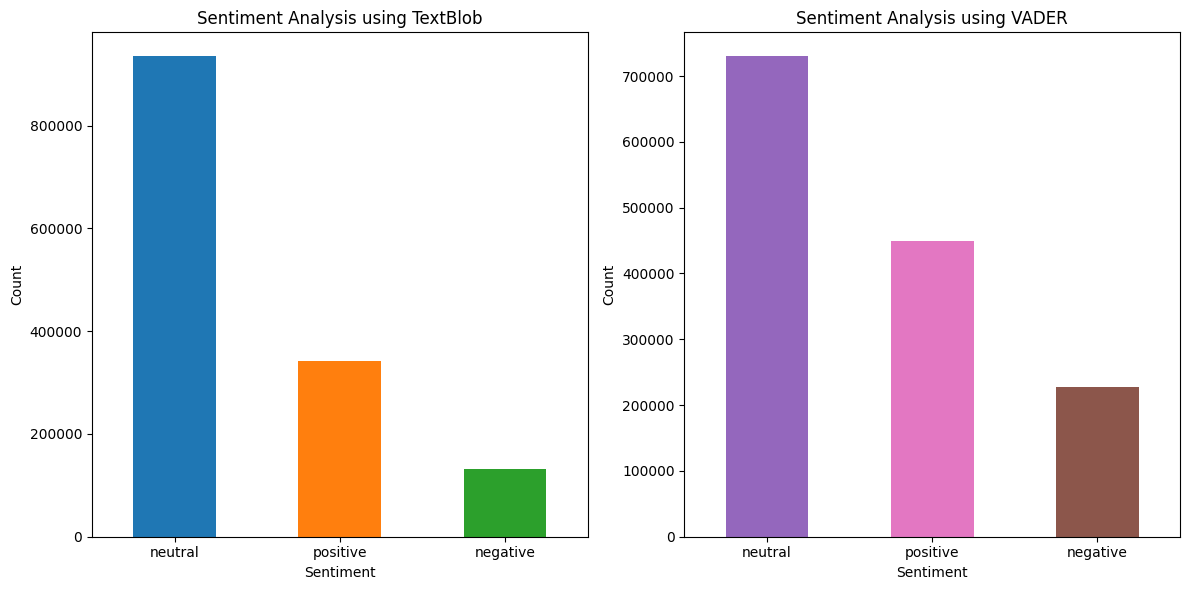

In [12]:
import matplotlib.pyplot as plt

# Count the sentiment distribution
sentiment_counts_textblob = df['sentiment_textblob'].value_counts()
sentiment_counts_vader = df['sentiment_vader'].value_counts()

# Define custom colors for the sentiments
custom_colors_textblob = ['#1f77b4', '#ff7f0e', '#2ca02c']  # Blue, Orange, Green
custom_colors_vader = ['#9467bd', '#e377c2', '#8c564b']     # Purple, Pink, Brown

# Create a figure for the plots
plt.figure(figsize=(12, 6))

# Plot the sentiment distribution using TextBlob
plt.subplot(1, 2, 1)  # 1 row, 2 columns, 1st plot
sentiment_counts_textblob.plot(kind='bar', color=custom_colors_textblob)
plt.title('Sentiment Analysis using TextBlob')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.xticks(rotation=0)

# Plot the sentiment distribution using VADER
plt.subplot(1, 2, 2)  # 1 row, 2 columns, 2nd plot
sentiment_counts_vader.plot(kind='bar', color=custom_colors_vader)
plt.title('Sentiment Analysis using VADER')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.xticks(rotation=0)

# Adjust layout to prevent overlap
plt.tight_layout()

# Display the plots
plt.show()


In [40]:
import pandas as pd
from textblob import TextBlob
import os

# Input file path
file_path_stock = r'../raw_data/filtered_stock_news.csv'

# Load the data
filtered_data = pd.read_csv(file_path_stock)

# Function to evaluate sentiment
def evaluate_sentiment(text):
    """
    Evaluates the sentiment polarity and categorizes it.
    Returns a tuple: (sentiment_label, sentiment_score)
    """
    if pd.isna(text):  # Handle missing or NaN headlines
        return "neutral", 0.0
    analysis = TextBlob(text)
    polarity = analysis.sentiment.polarity
    if polarity > 0:
        return "positive", polarity
    elif polarity < 0:
        return "negative", polarity
    else:
        return "neutral", polarity

# Apply the sentiment analysis
filtered_data[['sentiment', 'sentiment_score']] = filtered_data['headline'].apply(
    lambda x: pd.Series(evaluate_sentiment(x))
)

# Save the updated dataset in the same folder as the input file
output_file_name = 'filtered_stock_news_sentiment.csv'
output_path = os.path.join(os.path.dirname(file_path_stock), output_file_name)

filtered_data.to_csv(output_path, index=False)

# Print confirmation and a preview of the results
print(f"Sentiment analysis complete. File saved as: {output_path}")
print(filtered_data[['headline', 'sentiment', 'sentiment_score']].head())


Sentiment analysis complete. File saved as: ../raw_data\filtered_stock_news_sentiment.csv
                                            headline sentiment  \
0  Tech Stocks And FAANGS Strong Again To Start D...  positive   
1      10 Biggest Price Target Changes For Wednesday   neutral   
2  Benzinga Pro's Top 5 Stocks To Watch For Wed.,...  positive   
3  Deutsche Bank Maintains Buy on Apple, Raises P...   neutral   
4  Apple To Let Users Trade In Their Mac Computer...   neutral   

   sentiment_score  
0         0.433333  
1         0.000000  
2         0.500000  
3         0.000000  
4         0.000000  


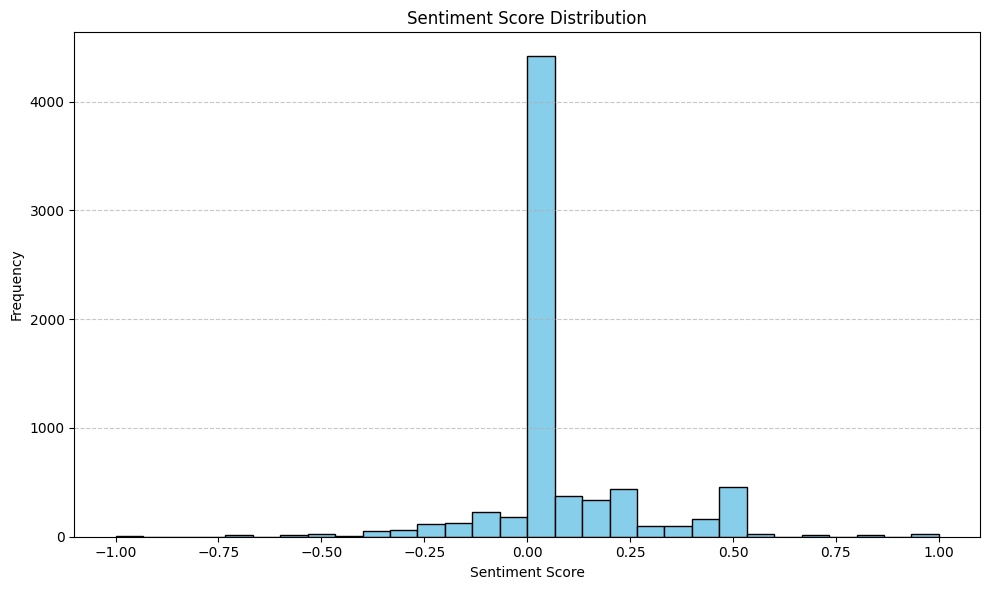

In [41]:
# Plot Sentiment Distribution
import matplotlib.pyplot as plt

# Input file path
file_path_stock = r'../raw_data/filtered_stock_news_sentiment.csv'

# Load the dataset
data = pd.read_csv(file_path_stock)

plt.figure(figsize=(10, 6))
plt.hist(data['sentiment_score'], bins=30, color='skyblue', edgecolor='black')
plt.title('Sentiment Score Distribution')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

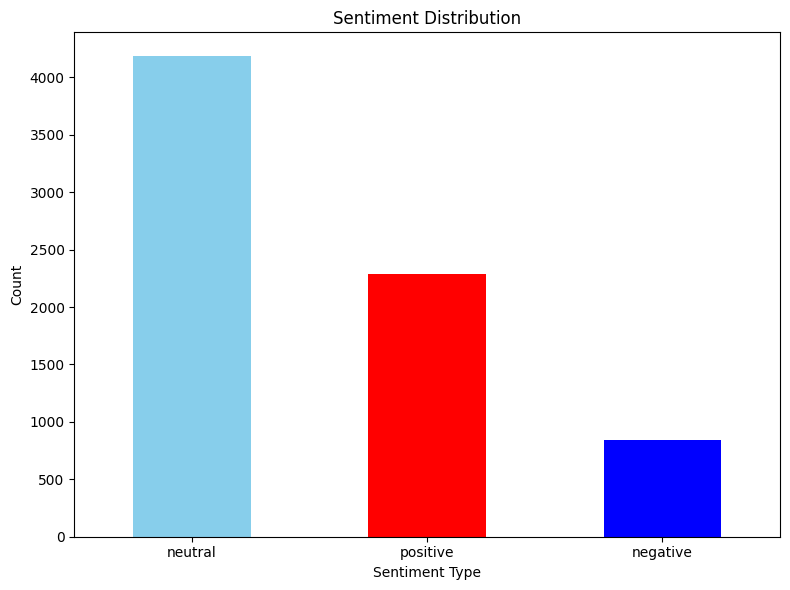

In [42]:
# Count the occurrences of each sentiment type
sentiment_counts = data['sentiment'].value_counts()

# Plotting the bar chart
plt.figure(figsize=(8, 6))
sentiment_counts.plot(kind='bar', color=['skyblue', 'red', 'blue'])

# Add titles and labels
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment Type')
plt.ylabel('Count')
plt.xticks(rotation=0)

plt.tight_layout()
plt.show()

In [38]:
# Standardize the Date format for news published

import pandas as pd
from datetime import datetime  # Ensure datetime is imported properly

# Function to parse and standardize dates
def parse_dates(date_str):
    try:
        # First, try to parse the ISO 8601 format with timezone (e.g., 2020-05-26 04:30:07-04:00)
        date_obj = datetime.strptime(date_str, "%Y-%m-%d %H:%M:%S%z")
        return date_obj.strftime('%Y-%m-%d')  # Only return month/day/year
    except ValueError:
        try:
            # Then, try parsing the format with no time zone (e.g., 5/22/2020 0:00 or 2020-05-21 00:00:00)
            date_obj = datetime.strptime(date_str, "%Y-%m-%d %H:%M:%S")
            return date_obj.strftime('%Y-%m-%d')  # Only return month/day/year
        except ValueError:
            try:
                # Then, try parsing the format without time and in the m/d/Y format (e.g., 5/22/2020 0:00)
                date_obj = datetime.strptime(date_str, "%m/%d/%Y %H:%M")
                return date_obj.strftime('%Y-%m-%d')  # Only return month/day/year
            except ValueError:
                print(f"Unrecognized date format: {date_str}")
                return None


# File paths
input_file = r'../raw_data/filtered_stock_news_sentiment.csv'
output_file = '../raw_data/filtered_Stock_news_Date.csv'

# Read the CSV
df = pd.read_csv(input_file)

# Ensure the column name exists
date_column = 'date'
if date_column not in df.columns:
    raise ValueError(f"Column '{date_column}' not found in the CSV file.")

# Apply the parsing function to standardize dates
df[date_column] = df[date_column].apply(parse_dates)

# Drop rows where dates couldn't be parsed
df = df.dropna(subset=[date_column])

# Save to new CSV file
df.to_csv(output_file, index=False)

print(f"Standardized dates saved to {output_file}")



Unrecognized date format: 2020-06-10
Unrecognized date format: 2020-06-10
Unrecognized date format: 2020-06-10
Unrecognized date format: 2020-06-10
Unrecognized date format: 2020-06-10
Unrecognized date format: 2020-06-10
Unrecognized date format: 2020-06-09
Unrecognized date format: 2020-06-09
Unrecognized date format: 2020-06-09
Unrecognized date format: 2020-06-09


TypeError: strptime() argument 1 must be str, not float

In [36]:
import pandas as pd
import os

# Input file paths
file_path_stock_news = r'../raw_data/companies_historical_data.csv'

# Output file paths (overwrite the existing files)
output_path_news = file_path_stock_news

def standardize_date_format(file_path, output_path):
    """
    Standardize the date format in a file to YYYY-MM-DD.
    """
    # Load the dataset
    df = pd.read_csv(file_path)
    
    # Rename column 'Date' to 'date' (case insensitive)
    df.rename(columns={'Date': 'date'}, inplace=True)
    df.rename(columns={'Company': 'stock'}, inplace=True)

    # Ensure a consistent date format in the 'date' column
    df['date'] = pd.to_datetime(df['date'], errors='coerce').dt.strftime('%Y-%m-%d')
    
    # Save the cleaned file
    df.to_csv(output_path, index=False)
    print(f"Standardized date format and saved to: {output_path}")
    print(df.head())

# Standardize date format for both files
standardize_date_format(file_path_stock_news, output_path_news)


Standardized date format and saved to: ../raw_data/companies_historical_data.csv
         date      Open      High       Low     Close  Adj Close     Volume  \
0  1980-12-12  0.128348  0.128906  0.128348  0.128348   0.098943  469033600   
1  1980-12-15  0.122210  0.122210  0.121652  0.121652   0.093781  175884800   
2  1980-12-16  0.113281  0.113281  0.112723  0.112723   0.086898  105728000   
3  1980-12-17  0.115513  0.116071  0.115513  0.115513   0.089049   86441600   
4  1980-12-18  0.118862  0.119420  0.118862  0.118862   0.091630   73449600   

   Dividends  Stock Splits stock  
0        0.0           0.0  AAPL  
1        0.0           0.0  AAPL  
2        0.0           0.0  AAPL  
3        0.0           0.0  AAPL  
4        0.0           0.0  AAPL  
